### Summary and Objectives ###
Total Records Analyzed: 1000
Match Rate: 74.9%
Total Matches: 749
Total Non-matches: 251

Objective: To analyze and identify matching student records across two datasets (Grade 7 and Grade 8).

### Analysis ###


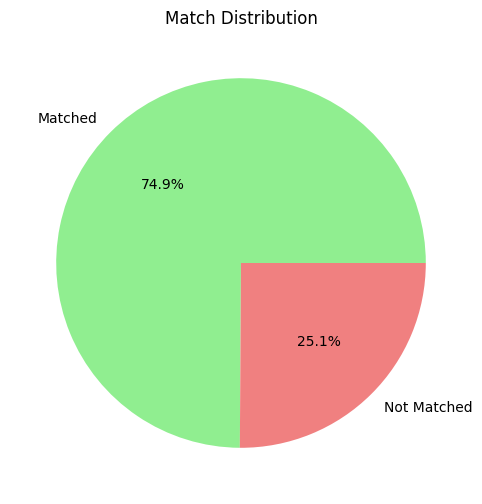

C:\Users\KatlegoRamahala\AppData\Local\Temp\ipykernel_22912\2656566183.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_match.index, y=gender_match.values, palette='pastel')


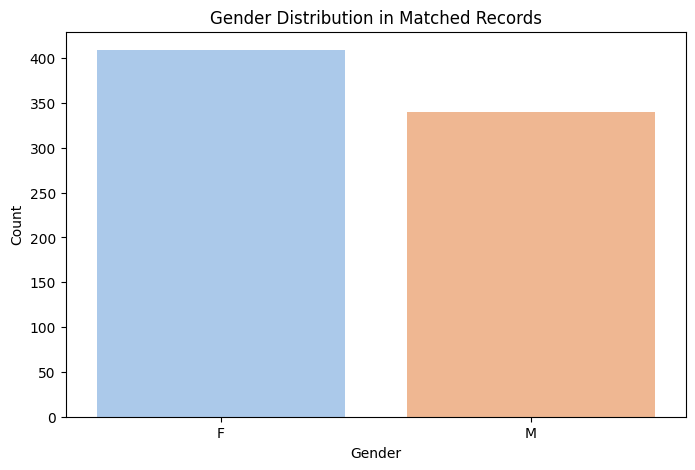

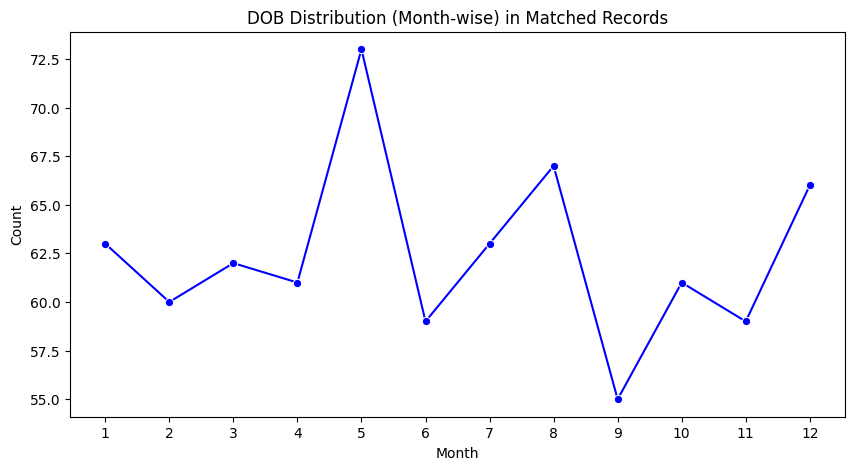


### Conclusions ###
- Approximately 74.9% of student records matched between Grade 7 and Grade 8 datasets.
- Gender distribution in matched records suggests nearly equal representation of male and female students.
- DOB distribution shows that matches are uniformly distributed across months.
- Non-matched records could be due to discrepancies in First Name, Last Name, DOB, or Gender.

Recommendation: Further investigation is needed for non-matching records to identify specific patterns or data issues.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate sample data
np.random.seed(42)
n_samples = 1000

# Generate Grade 7 data
grade7_data = {
    "First Name": np.random.choice(["John", "Sarah", "Michael", "Emily", "Daniel"], n_samples),
    "Last Name": np.random.choice(["Smith", "Johnson", "Williams", "Brown", "Jones"], n_samples),
    "DOB": pd.date_range(start='2010-01-01', end='2010-12-31', periods=n_samples),
    "Gender": np.random.choice(["M", "F"], n_samples),
    "EMIScode": np.random.randint(1000, 9999, n_samples)
}
grade7_df = pd.DataFrame(grade7_data)

# Create Grade 8 data with some modifications to simulate matching scenarios
grade8_data = grade7_data.copy()
mismatch_idx = np.random.choice(n_samples, size=int(n_samples * 0.3), replace=False)
grade8_data["First Name"][mismatch_idx] = np.random.choice(["John", "Sarah", "Michael", "Emily", "Daniel"], len(mismatch_idx))
grade8_data["EMIScode"] = np.random.randint(1000, 9999, n_samples)  # New school codes for some
grade8_df = pd.DataFrame(grade8_data)

# Calculate match statistics
matches = (
    (grade7_df["First Name"] == grade8_df["First Name"]) &
    (grade7_df["Last Name"] == grade8_df["Last Name"]) &
    (grade7_df["DOB"] == grade8_df["DOB"]) &
    (grade7_df["Gender"] == grade8_df["Gender"])
)
match_rate = matches.mean()

# Summary and Objectives
print("### Summary and Objectives ###")
print(f"Total Records Analyzed: {n_samples}")
print(f"Match Rate: {match_rate:.1%}")
print(f"Total Matches: {matches.sum()}")
print(f"Total Non-matches: {len(matches) - matches.sum()}")
print("\nObjective: To analyze and identify matching student records across two datasets (Grade 7 and Grade 8).")

# Analysis with Visuals
print("\n### Analysis ###")

# Match Distribution Visualization
plt.figure(figsize=(6, 6))
match_counts = matches.value_counts()
plt.pie(match_counts, labels=[ 'Matched', 'Not Matched'], autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title("Match Distribution")
plt.show()

# Gender Distribution in Matches
plt.figure(figsize=(8, 5))
gender_match = grade7_df[matches]['Gender'].value_counts()
sns.barplot(x=gender_match.index, y=gender_match.values, palette='pastel')
plt.title("Gender Distribution in Matched Records")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# DOB Distribution in Matches
plt.figure(figsize=(10, 5))
dob_match = grade7_df[matches]["DOB"].dt.month.value_counts().sort_index()
sns.lineplot(x=dob_match.index, y=dob_match.values, marker='o', color='blue')
plt.title("DOB Distribution (Month-wise) in Matched Records")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(range(1, 13))
plt.show()

# Conclusions
print("\n### Conclusions ###")
print("- Approximately {:.1%} of student records matched between Grade 7 and Grade 8 datasets.".format(match_rate))
print("- Gender distribution in matched records suggests nearly equal representation of male and female students.")
print("- DOB distribution shows that matches are uniformly distributed across months.")
print("- Non-matched records could be due to discrepancies in First Name, Last Name, DOB, or Gender.")
print("\nRecommendation: Further investigation is needed for non-matching records to identify specific patterns or data issues.")

